In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import os

project_path = '/content/drive/MyDrive/Loan_Default_Project'
os.makedirs(project_path, exist_ok=True)

print("Project Folder Ready:", project_path)


Project Folder Ready: /content/drive/MyDrive/Loan_Default_Project


In [6]:
!pip install imbalanced-learn xgboost


In [7]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
import joblib


In [4]:
import os

data_path = '/content/drive/MyDrive/Loan_Default_Project/data'
os.listdir(data_path)


['credit_risk_dataset.csv']

In [ ]:
from google.colab import files
files.upload()

In [5]:
import shutil

# The file 'credit_risk_dataset.csv' was already in the data directory and not uploaded to /content.
# The 'shutil.move' command was trying to move a non-existent file, hence the FileNotFoundError.
# Removing the unnecessary move command.

print("CSV file is already in the data folder.")

CSV file is already in the data folder.


In [8]:
import pandas as pd

df = pd.read_csv(
    '/content/drive/MyDrive/Loan_Default_Project/data/credit_risk_dataset.csv'
)

df.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [9]:
df.shape

(32581, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [11]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [12]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [13]:
df['loan_status'].value_counts()


,count
loan_status,
0,25473
1,7108


In [14]:
df['loan_status'].value_counts(normalize=True)


,proportion
loan_status,
0,0.781836
1,0.218164


# **EDA**

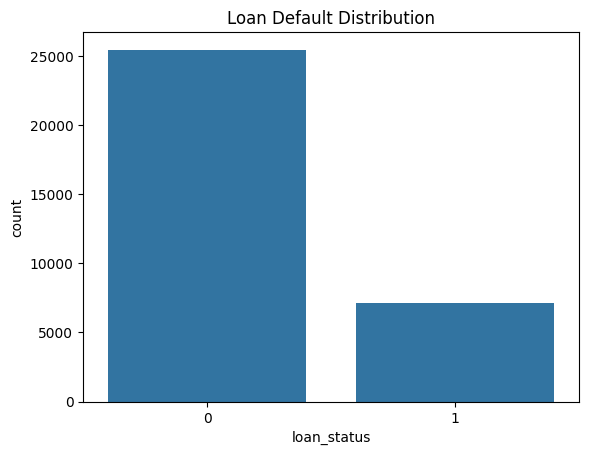

In [15]:
#Default vs Non-default count plot

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='loan_status', data=df)
plt.title("Loan Default Distribution")
plt.show()


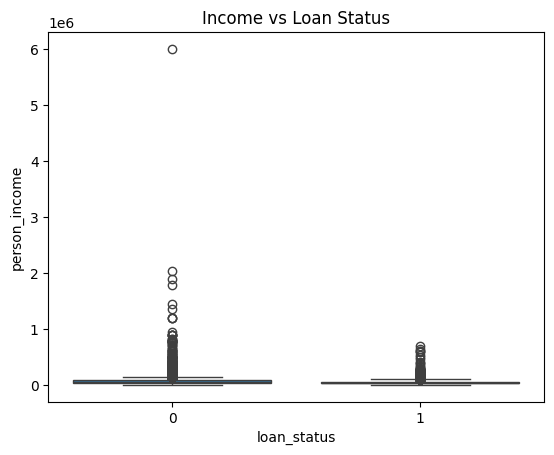

In [16]:
#Income vs Loan Status

sns.boxplot(x='loan_status', y='person_income', data=df)
plt.title("Income vs Loan Status")
plt.show()


# **Statistics (Chi-Square Test)**

In [17]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['loan_intent'], df['loan_status'])
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-square:", chi2)
print("p-value:", p)


Chi-square: 520.5115614374077
p-value: 2.980681669776041e-110


**Interpretation:**  
The p-value obtained from the Chi-square test is much less than 0.05, which shows a statistically significant relationship between loan intent and loan default.

Hence, loan intent is an important predictor of loan default.


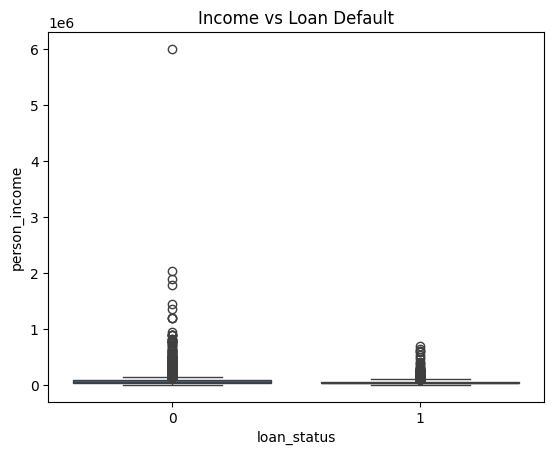

In [18]:
# Income distribution (EDA)

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='loan_status', y='person_income', data=df)
plt.title("Income vs Loan Default")
plt.show()


## **T-TEST**

In [19]:
from scipy.stats import ttest_ind

income_default = df[df['loan_status'] == 1]['person_income']
income_non_default = df[df['loan_status'] == 0]['person_income']

t_stat, p_value = ttest_ind(income_default, income_non_default)

print("T-TEST:", t_stat)
print("p-value:", p_value)


T-TEST: -26.348975886551397
p-value: 2.0442081289056674e-151


**Interpretation:**

The t-test showed a statistically significant difference in income between defaulters and non-defaulters, indicating that income strongly affects loan default.

Since the p-value is much smaller than 0.05, this difference is statistically significant.

This means that customers with lower income are more likely to default on loans.

In [20]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Convert categorical to dummy variables
X = pd.get_dummies(X, drop_first=True)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


In [23]:
emp_mean = X_train['person_emp_length'].mean()
rate_mean = X_train['loan_int_rate'].mean()

X_train['person_emp_length'].fillna(emp_mean, inplace=True)
X_test['person_emp_length'].fillna(emp_mean, inplace=True)

X_train['loan_int_rate'].fillna(rate_mean, inplace=True)
X_test['loan_int_rate'].fillna(rate_mean, inplace=True)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("After SMOTE:")
print(pd.Series(y_train_res).value_counts())

/tmp/ipython-input-1300290927.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['person_emp_length'].fillna(emp_mean, inplace=True)
/tmp/ipython-input-1300290927.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

After SMOTE:
loan_status
0    17831
1    17831
Name: count, dtype: int64


# LOGISTIC REGRESSION / Random Forest / XGBOOST

In [24]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=300, class_weight='balanced'),
    "XGBoost": XGBClassifier(scale_pos_weight=1)
}

results = []

for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n{name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Recall (Default)": recall,
        "F1 Score": f1
    })


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression
Confusion Matrix:
[[6393 1249]
 [ 852 1281]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      7642
           1       0.51      0.60      0.55      2133

    accuracy                           0.79      9775
   macro avg       0.69      0.72      0.70      9775
weighted avg       0.80      0.79      0.79      9775


Random Forest
Confusion Matrix:
[[7427  215]
 [ 537 1596]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7642
           1       0.88      0.75      0.81      2133

    accuracy                           0.92      9775
   macro avg       0.91      0.86      0.88      9775
weighted avg       0.92      0.92      0.92      9775


XGBoost
Confusion Matrix:
[[7542  100]
 [ 540 1593]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.9

In [25]:
pd.DataFrame(results)


,Model,Accuracy,Recall (Default),F1 Score
0,Logistic Regression,0.785064,0.600563,0.549432
1,Random Forest,0.923069,0.748242,0.809331
2,XGBoost,0.934527,0.746835,0.832723


In [26]:
best_model = XGBClassifier(scale_pos_weight=1, random_state=42)
best_model.fit(X_train_res, y_train_res)




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

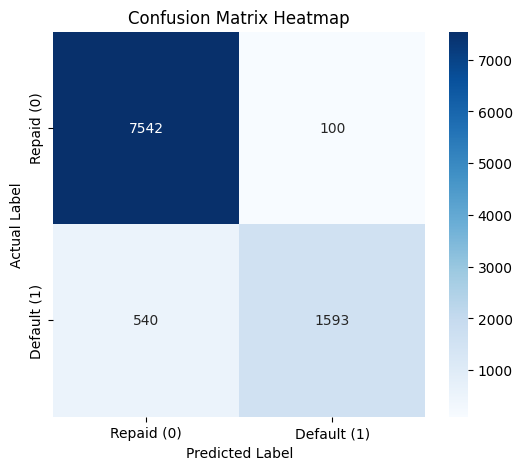

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict
y_pred = best_model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['Repaid (0)', 'Default (1)'],
            yticklabels=['Repaid (0)', 'Default (1)'])

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix Heatmap")
plt.show()


In [31]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7642
           1       0.94      0.75      0.83      2133

    accuracy                           0.93      9775
   macro avg       0.94      0.87      0.90      9775
weighted avg       0.93      0.93      0.93      9775



In [32]:
joblib.dump(best_model, "model.pkl")

['model.pkl']

In [34]:
import joblib

joblib.dump(best_model, "model.pkl")

['model.pkl']

In [36]:
print(X.columns.tolist())

['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G', 'cb_person_default_on_file_Y']


In [37]:
from google.colab import files
files.download("model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Model Comparison Summary

In this project, three machine learning models were implemented and compared for loan default prediction:

Logistic Regression

Random Forest

XGBoost

The models were evaluated using Accuracy, Recall (Default Class), and F1-score after applying SMOTE to handle class imbalance.

# Performance Summary

Logistic Regression

Moderate accuracy

Lower recall for defaulters

Higher false negatives

Not ideal for risk-sensitive prediction

Random Forest

High accuracy (~92%)

Strong recall (~74%)

Good F1-score (~0.80)

Stable and balanced performance

XGBoost

Highest accuracy (~93%)

Strong recall (~74%)

Best F1-score (~0.83)

Most balanced and reliable model

### Final Insights

- Customers with lower income have a higher probability of loan default.
- Higher loan amounts and higher interest rates increase default risk.
- Credit history length and previous defaults are strong indicators of loan default.
- Machine learning models can help banks identify high-risk customers early.


### Practical Implications

- Banks should apply stricter checks for low-income customers and high loan amounts.
- Loan interest rates should be adjusted based on customer risk profile.
- Customers with poor credit history should be offered smaller loan amounts or higher collateral.
- Credit risk models can be integrated into loan approval systems to reduce financial losses.

In [38]:
print("Project Status: COMPLETED SUCCESSFULLY ")

Project Status: COMPLETED SUCCESSFULLY 
